# HOMEWORK 2

## Risk Management of Bonds

-- Canel Biryol and Shashank Gupta

### Environment setup

All the analysis in this has been done using the Python libraries 'Pandas' and 'SciPy'

First, we setup the Python dependencies:

In [1]:
# import numpy as np
# import pandas as pd
# import scipy
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math
# import datetime
# import matplotlib.pyplot as plt

# sns.set(color_codes=True)
# epsilon = 1e-4
# %matplotlib inline

In [16]:
df = pd.read_csv('data/FRB_H15_reduced.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
# Get rid of rows with 'ND' as value
df = df[df['1-month'] != 'ND']
df = df.astype(float)
# To see how the data looks like
df.head()

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
Date,,,,,,,,,,,
2007-03-23,5.24,5.08,5.10,4.93,4.60,4.54,4.52,4.54,4.62,4.88,4.80
2007-03-26,5.22,5.06,5.09,4.91,4.56,4.50,4.48,4.51,4.60,4.86,4.79
2007-03-27,5.20,5.08,5.09,4.91,4.58,4.51,4.50,4.53,4.62,4.89,4.81
2007-03-28,5.18,5.06,5.08,4.90,4.53,4.49,4.50,4.53,4.62,4.90,4.83
2007-03-29,5.05,5.05,5.06,4.90,4.58,4.52,4.53,4.55,4.64,4.90,4.83


In [18]:
# corr_matrix = df.corr()
# # To show how the correlation matrix looks like
# corr_matrix

In [19]:
# eig_values, eig_vectors = np.linalg.eigh(corr_matrix)
# # Make a list of (eigenvalue, eigenvector) tuples, and sort them by 
# eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
# eig_pairs.sort(key=lambda x: x[0], reverse=True)
# # Show the first eigenvectors:
# eig_pairs

In [20]:
# # Gamma is given by N/T, where N is the number of iid random variables
# gamma = float(df.shape[1])/float(df.shape[0])
# mp_value_pos = (1 + math.sqrt(gamma))**2
# mp_value_neg = (1 - math.sqrt(gamma))**2
# print mp_value_pos, mp_value_neg
# print df.shape

In [21]:
# sig_eig_pairs = [(val, vec) for val, vec in eig_pairs if val > mp_value_pos]
# sig_eig_pairs

In [315]:
# df_std = df/df.std()

# sig_eig_vecs = np.array([ vec for val, vec in sig_eig_pairs])
# sig_eig_vecs_proj_matrix = np.dot(sig_eig_vecs.T, sig_eig_vecs)

# projection = pd.DataFrame(np.dot(df_std, sig_eig_vecs_proj_matrix))
# residual = pd.DataFrame(np.array(df_std) - projection)
# residual_corr = residual.corr()
# print residual.head()

In [316]:
# res_eig_vals, res_eig_vecs = np.linalg.eigh(residual_corr)
# eig_pairs = [(np.abs(res_eig_vals[i]), res_eig_vecs[:,i]) for i in range(len(res_eig_vals))]
# eig_pairs.sort(key=lambda x: x[0], reverse=True)

# sig_eig_pairs = [(val, vec) for val, vec in eig_pairs if val > mp_value_pos]

# sig_eig_vecs = np.array([ vec for val, vec in sig_eig_pairs])
# sig_eig_vecs_proj_matrix = np.dot(sig_eig_vecs.T, sig_eig_vecs)

# projection = pd.DataFrame(np.dot(residual, sig_eig_vecs_proj_matrix))
# residual = pd.DataFrame(np.array(residual) - projection)
# residual = residual/residual.std()
# residual_corr = residual.corr()

# res_eig_vals, res_eig_vecs = np.linalg.eigh(residual_corr)
# res_eig_vals

In [317]:
# # Remove eigenvalues which are less then epsilon (our precision tolerance), since those generally exist because of 
# # degeneracy and floating-point precision errors
# #res_eig_vals = np.array([val for val in res_eig_vals if (val > epsilon)])
# def eigden(lam, T, N):
#     # Method for plotting Marchenko Pastur distribution
#     # Taken from: https://anaconda.org/steve98654/ana_con_server_demo/notebook
#     gamma = float(N)/float(T)
#     lambda_plus = (1 + np.sqrt(gamma))**2
#     lambda_minus = (1 - np.sqrt(gamma))**2
#     return 1/(2 * np.pi * float(lam) * gamma) * np.sqrt((lambda_plus - lam) * (lam - lambda_minus))


# plt.figure(figsize=(16,10))
# plt.hist(res_eig_vals, bins=75, normed=True)

# lamvls = np.linspace(0.0001,5,1000) 
# plt.plot(lamvls,[eigden(lam, df.shape[0], df.shape[1]) for lam in lamvls])

# plt.title('Fig (1): Histogram of eigenvalues of residual matrix for first quarter')
# plt.show()

In [257]:
weights = np.array([0, -100, -50, 0, 50, 0, -20, 0, 50, 0, 0])
weights = weights/np.abs(weights).sum()
variance = np.dot(np.dot(df.cov(), weights), weights.T)
math.sqrt(variance)


3.293755108754495

In [258]:
portfolio = df.dot(weights)
portfolio.head()

Date
2007-03-23   -14.70
2007-03-26   -14.63
2007-03-27   -14.67
2007-03-28   -14.64
2007-03-29   -14.64
dtype: float64

In [259]:
from scipy.stats import norm, t

# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(portfolio)
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)
print("Integral norm.pdf(x; mu_norm, sig_norm) dx = %.2f" % (np.sum(pdf*dx)))
print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
 
# Student t best fit (finding: nu)
parm = t.fit(portfolio)
nu, mu_t, sig_t = parm
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("Integral t.pdf(x; mu, sig) dx = %.2f" % (np.sum(pdf2*dx)))
print("nu = %.2f" % nu)


Integral norm.pdf(x; mu_norm, sig_norm) dx = 0.02
Sample mean  = -3.12871
Sample stdev = 3.29310
()
Integral t.pdf(x; mu, sig) dx = 0.01
nu = 0.95
()


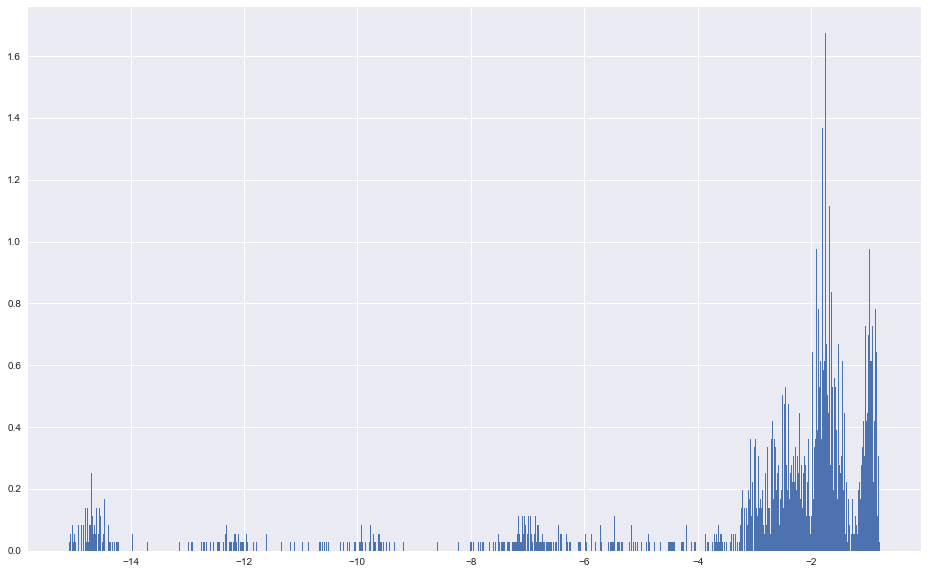

In [263]:
plt.figure(figsize=(16,10))
plt.hist(portfolio, bins=1000, normed=True)
plt.show()

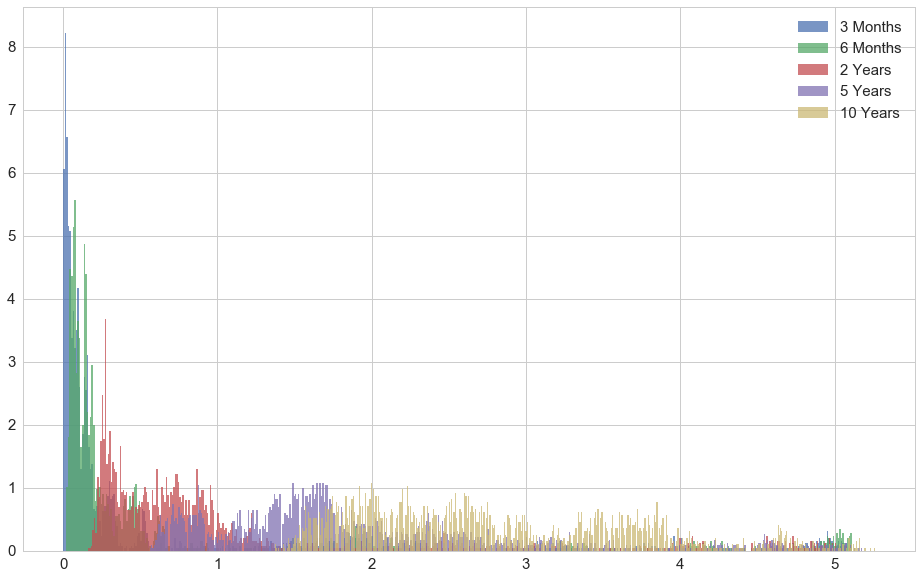

In [303]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
df_change = df.pct_change()[1:]
df_change = df_change.replace([np.inf, -np.inf], np.nan)
df_change = df_change.fillna(value=0)*100
plt.figure(figsize=(16,10))

#bins = xrange(int(df['3-month'].min())-1, int(df_change['3-month'].max())+1)
plt.hist(df['3-month'], bins=500, alpha=0.75, label='3 Months', normed=True)
plt.hist(df['6-month'], bins=500, alpha=0.75, label='6 Months', normed=True)
plt.hist(df['2-year'], bins=500, alpha=0.75, label='2 Years', normed=True)
plt.hist(df['5-year'], bins=500, alpha=0.75, label='5 Years', normed=True)
plt.hist(df['10-year'], bins=500, alpha=0.75, label='10 Years', normed=True)
# fig, ax = plt.subplots(1, figsize=(16,10))
# df_change['3-month'].plot(ax=ax, alpha=0.75, label='3 Months')
# df_change['6-month'].plot(ax=ax, alpha=0.75, label='6 Months')
# df_change['2-year'].plot(ax=ax, alpha=0.75, label='2 years')
# df_change['5-year'].plot(ax=ax, alpha=0.75, label='5 years')
# df_change['10-year'].plot(ax=ax, alpha=0.75, label='10 years')
plt.legend(loc='best')
plt.show()

In [310]:
corr_matrix_example = pd.read_csv('data/CorrelationMatrix.csv', index_col=0)
corr_matrix_example = corr_matrix_example.astype(float)
corr_matrix_example

,TSY0-3Mon,TSY3-6Mon,TSY6-9Mon,TSY9-12Mon,TSY1-3Yr,TSY3-5Yr,TSY5-7Yr,TSY7-10Yr,TSY10-15Yr,TSY15+Yr
TSY0-3Mon,1.00,0.88,0.77,0.66,0.33,0.21,0.16,0.12,0.10,0.07
TSY3-6Mon,0.88,1.00,0.94,0.85,0.50,0.35,0.28,0.22,0.18,0.14
TSY6-9Mon,0.77,0.94,1.00,0.95,0.63,0.46,0.38,0.30,0.26,0.21
TSY9-12Mon,0.66,0.85,0.95,1.00,0.76,0.59,0.49,0.41,0.36,0.28
TSY1-3Yr,0.33,0.50,0.63,0.76,1.00,0.92,0.83,0.73,0.66,0.54
TSY3-5Yr,0.21,0.35,0.46,0.59,0.92,1.00,0.97,0.91,0.84,0.73
TSY5-7Yr,0.16,0.28,0.38,0.49,0.83,0.97,1.00,0.97,0.93,0.83
TSY7-10Yr,0.12,0.22,0.30,0.41,0.73,0.91,0.97,1.00,0.98,0.91
TSY10-15Yr,0.10,0.18,0.26,0.36,0.66,0.84,0.93,0.98,1.00,0.96
TSY15+Yr,0.07,0.14,0.21,0.28,0.54,0.73,0.83,0.91,0.96,1.00


In [319]:
eig_values_example, eig_vectors_example = np.linalg.eigh(corr_matrix_example)
# Make a list of (eigenvalue, eigenvector) tuples, and sort them by 
eig_pairs_example = [(np.abs(eig_values_example[i]), eig_vectors_example[:,i]) for i in range(len(eig_values_example))]
eig_pairs_example.sort(key=lambda x: x[0], reverse=True)
# Show the first three eigenvectors:
eig_pairs_example

[(6.2502656226963893,
  array([-0.18761791, -0.24414049, -0.27821824, -0.30830808, -0.3589407 ,
         -0.37106924, -0.36629309, -0.35248913, -0.33796005, -0.30588996])),
 (2.7738177032943776,
  array([ 0.44758329,  0.45446592,  0.41122634,  0.33392048,  0.01400533,
         -0.14769201, -0.21819259, -0.26757445, -0.28828702, -0.29698041])),
 (0.57256754968908152,
  array([-0.47623757, -0.1931835 ,  0.04370846,  0.25500111,  0.52490635,
          0.29321389,  0.07696926, -0.1324251 , -0.27780356, -0.45475858])),
 (0.23040131607808703,
  array([-0.6012991 ,  0.03734948,  0.37704056,  0.41053237, -0.19613666,
         -0.30263474, -0.21316922, -0.05450887,  0.1196251 ,  0.36546972])),
 (0.075928610450146303,
  array([ 0.33123488, -0.4405623 , -0.16273046,  0.20576202,  0.48772556,
         -0.14893463, -0.36222848, -0.27489777,  0.04512643,  0.39811646])),
 (0.047928962018675879,
  array([-0.22761741,  0.5207673 ,  0.02048961, -0.53324533,  0.37166075,
          0.06515506, -0.10749593

In [320]:
eig_pairs

[(9.3629296613282964,
  array([-0.30060498, -0.30356064, -0.30575833, -0.30833868, -0.31562478,
         -0.31960947, -0.3194202 , -0.31059094, -0.29885566, -0.26921944,
         -0.25858783])),
 (1.4236628443345969,
  array([ 0.29570933,  0.29110196,  0.28535226,  0.27016236,  0.19998749,
          0.10957622, -0.07955802, -0.2229635 , -0.33657792, -0.46207772,
         -0.48842335])),
 (0.16978095722498715,
  array([ 0.34854315,  0.29061   ,  0.1944923 ,  0.07582613, -0.18469758,
         -0.37875589, -0.44856539, -0.36208013, -0.05478995,  0.25098062,
          0.41786515])),
 (0.024405845024371736,
  array([ 0.54228028,  0.21801651, -0.19127848, -0.40930849, -0.36463832,
         -0.12694433,  0.21302851,  0.34907013,  0.07200981, -0.3620655 ,
          0.04118386])),
 (0.0091864623287390441,
  array([-0.13746864, -0.03255337, -0.09633975, -0.01239493,  0.26778721,
          0.19717062, -0.01432384, -0.04662964, -0.28208732, -0.5285679 ,
          0.70617608])),
 (0.005939812203149

## Question 1 

For each tenor bucket, a 'haircut' $h_i$ is given.
Let us assume this 'haircut' is proportional to the 99% VaR of bond returns

\begin{align}
h_i \propto \sigma_i
\newline
\implies h_i = k\sigma_i
\newline
\implies \sigma_i = \frac{h_i}{k}
\end{align}
where $k$ is a constant

Let $N_i$ be the net value held in bucket $i$. Then, the net value $N$ is given as:
\begin{align}
N = \sum_{i=1}^{10} N_i
\end{align}

This gives us the weight of each bucket as following:
\begin{align}
w_i = \frac{N_i}{N}
\end{align}

Now, assuming bond returns follow normal distribution, let $\sigma$ be the standard deviation of the portfolio. Then:
\begin{align}
\sigma = \sqrt{\textbf{$w^\intercal$ $\Sigma$ $w$}}
\end{align}
where $\textbf{$w$}$ $\Rightarrow$ weights vector and $\Sigma$ $\Rightarrow$ Covariance Matrix


\begin{align}
\implies \sigma= \sqrt{\begin{bmatrix}w_1 & w_2 & \ldots & w_{10} \end{bmatrix}
                        \begin{bmatrix} 
                            \sigma_{1}^{2} & \sigma_{1}\sigma_{2}\rho_{12} & \dots & \sigma_{1}\sigma_{10}\rho_{110}\\
                            \sigma_{1}\sigma_{2}\rho_{12} & \sigma_{2}^2 & \dots \\
                            \vdots  &  & \ddots & \vdots \\
                            \sigma_{1}\sigma_{10}\rho_{110} &     &   & \sigma_{10}^{2} 
                            \end{bmatrix}
                        \begin{bmatrix}w_1 \\ w_2 \\ \ldots \\ w_{10} \end{bmatrix}}
\end{align}

\begin{align}
= \sqrt{\sum_{i=1}^{10} \sum_{j=1}^{10} \sigma_i \sigma_j \rho_{ij} w_i w_j} \\
= \sqrt{\sum_{i=1}^{10} \sum_{j=1}^{10} \frac{h_i}{k}\frac{h_j}{k}\rho_{ij}\frac{N_i}{N}\frac{N_j}{N}} \\
\implies \sigma = \frac{1}{kN} \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j}
\end{align}
  
Now, since we assumed the bond returns to be distributed normally, a linear combination of them will also be normally distributed.
  
Hence, for the portfolio the haircut '$h$' will be given by:
\begin{align}
h \propto \sigma
\newline
\implies h = k\sigma \\
\end{align}
\begin{align}
\implies h = k  \frac{1}{kN} \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j} \\
\implies h = \frac{1}{N} \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j}
\end{align}

Thus, the risk premium $\textbf{R}$ is given by:
\begin{align}
\textbf{R} = h N
= \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j}
\end{align}



***
## Question 2

Using the link provided https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H15 we downloaded the Constant Maturity Treasury (CMT) bond rates for the following tenors : 1-Month, 3-Month, 6-Month, 1-Year, 3-Year, 5-Year, 7-Year, 10-Year, 20-Year, and 30-Year. We only took a subsection of the data provided; from 2007-03-23 to 2017-03-23 (10 years data)

To reduced the table headers to make it easier to read by Pandas. The relevant file 'FRB_H15_reduced.csv' can be seen in the 'data' directory

All the analysis in this has been done using the Python libraries 'Pandas' and 'NumPy'  

First, we setup the Python dependencies:

In [8]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

Next, we load the timeseries data into a Pandas dataframe:

In [9]:
df = pd.read_csv('data/FRB_H15_reduced.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
# Get rid of rows with 'ND' as value
df = df[df['1-month'] != 'ND']
df = df.astype(float)
# To see how the data looks like
df.head()

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
Date,,,,,,,,,,,
2007-03-23,5.24,5.08,5.10,4.93,4.60,4.54,4.52,4.54,4.62,4.88,4.80
2007-03-26,5.22,5.06,5.09,4.91,4.56,4.50,4.48,4.51,4.60,4.86,4.79
2007-03-27,5.20,5.08,5.09,4.91,4.58,4.51,4.50,4.53,4.62,4.89,4.81
2007-03-28,5.18,5.06,5.08,4.90,4.53,4.49,4.50,4.53,4.62,4.90,4.83
2007-03-29,5.05,5.05,5.06,4.90,4.58,4.52,4.53,4.55,4.64,4.90,4.83


### Historical Volatilities ###

Historical volatilities are the standard deviations for each interest rate:

In [10]:
volatilities = df.std()
volatilities

1-month    1.181415
3-month    1.196069
6-month    1.225081
1-year     1.188313
2-year     1.089356
3-year     1.038817
5-year     0.972643
7-year     0.916562
10-year    0.881610
20-year    0.902208
30-year    0.774207
dtype: float64

### Correlation Matrix ###

In [11]:
corr_matrix = df.corr()
# To show how the correlation matrix looks like
corr_matrix

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
1-month,1.000000,0.996157,0.988650,0.980268,0.957150,0.922289,0.841645,0.762961,0.696912,0.574766,0.546457
3-month,0.996157,1.000000,0.996193,0.989637,0.968581,0.934291,0.853933,0.774537,0.707737,0.584191,0.553151
6-month,0.988650,0.996193,1.000000,0.997418,0.979444,0.946374,0.866561,0.785603,0.717580,0.592526,0.555005
1-year,0.980268,0.989637,0.997418,1.000000,0.988929,0.960377,0.883735,0.803226,0.732418,0.605738,0.563677
2-year,0.957150,0.968581,0.979444,0.988929,1.000000,0.989651,0.933236,0.862196,0.787439,0.658582,0.613263
3-year,0.922289,0.934291,0.946374,0.960377,0.989651,1.000000,0.971372,0.916118,0.843886,0.718547,0.671766
5-year,0.841645,0.853933,0.866561,0.883735,0.933236,0.971372,1.000000,0.983375,0.936492,0.836475,0.797046
7-year,0.762961,0.774537,0.785603,0.803226,0.862196,0.916118,0.983375,1.000000,0.980128,0.910874,0.881436
10-year,0.696912,0.707737,0.717580,0.732418,0.787439,0.843886,0.936492,0.980128,1.000000,0.972240,0.952036
20-year,0.574766,0.584191,0.592526,0.605738,0.658582,0.718547,0.836475,0.910874,0.972240,1.000000,0.987019


### Covariance Matrix ###

In [13]:
cov_matrix = df.cov()
# To show how the covariance matrix looks like
cov_matrix

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
1-month,1.395742,1.407625,1.430902,1.376190,1.231835,1.131902,0.967131,0.826165,0.725867,0.612633,0.499822
3-month,1.407625,1.430581,1.459703,1.406575,1.262008,1.160853,0.993422,0.849102,0.746285,0.630402,0.512220
6-month,1.430902,1.459703,1.500824,1.452021,1.307116,1.204388,1.032565,0.882124,0.775018,0.654906,0.526403
1-year,1.376190,1.406575,1.452021,1.412088,1.280164,1.185527,1.021426,0.874844,0.767303,0.649414,0.518583
2-year,1.231835,1.262008,1.307116,1.280164,1.186696,1.119929,0.988815,0.860870,0.756246,0.647271,0.517217
3-year,1.131902,1.160853,1.204388,1.185527,1.119929,1.079140,0.981472,0.872272,0.772857,0.673443,0.540273
5-year,0.967131,0.993422,1.032565,1.021426,0.988815,0.981472,0.946035,0.876667,0.803035,0.734029,0.600197
7-year,0.826165,0.849102,0.882124,0.874844,0.860870,0.872272,0.876667,0.840085,0.791993,0.753229,0.625474
10-year,0.725867,0.746285,0.775018,0.767303,0.756246,0.772857,0.803035,0.791993,0.777237,0.773315,0.649811
20-year,0.612633,0.630402,0.654906,0.649414,0.647271,0.673443,0.734029,0.753229,0.773315,0.813979,0.689428


### Distribution ###

To see what kind of distribution the interest rates follow we decided to plot a histogram for tenors 3-Months, 6-Months, 2-Years, 5-years, and 10-Years, using the data we had:

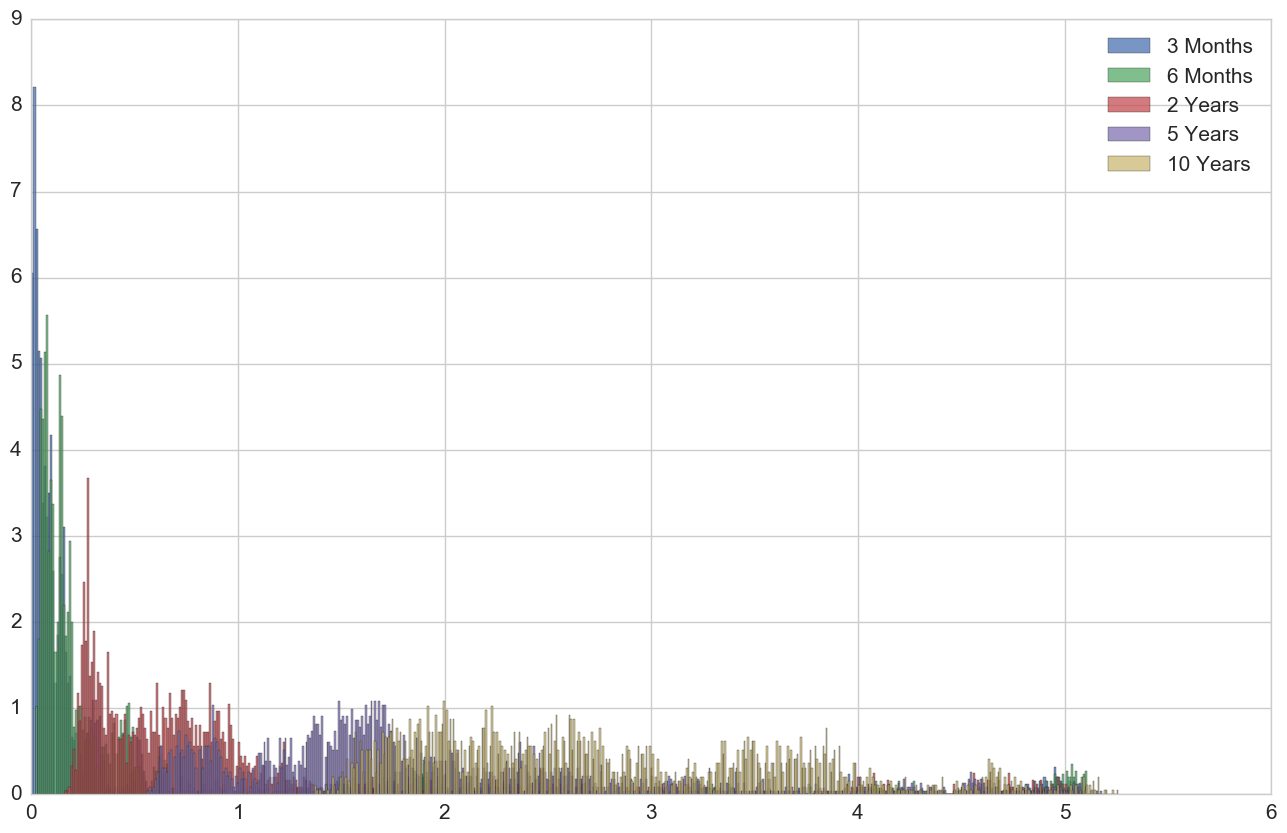

In [17]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
# plt.hist(df['1-month'], bins=500, alpha=0.75, label='1 Month', normed=True)
plt.hist(df['3-month'], bins=500, alpha=0.75, label='3 Months', normed=True)
plt.hist(df['6-month'], bins=500, alpha=0.75, label='6 Months', normed=True)
# plt.hist(df['1-year'], bins=500, alpha=0.75, label='1 Year', normed=True)
plt.hist(df['2-year'], bins=500, alpha=0.75, label='2 Years', normed=True)
# plt.hist(df['3-year'], bins=500, alpha=0.75, label='3 Years', normed=True)
plt.hist(df['5-year'], bins=500, alpha=0.75, label='5 Years', normed=True)
# plt.hist(df['7-year'], bins=500, alpha=0.75, label='7 Years', normed=True)
plt.hist(df['10-year'], bins=500, alpha=0.75, label='10 Years', normed=True)
# plt.hist(df['20-year'], bins=500, alpha=0.75, label='20 Years', normed=True)
# plt.hist(df['30-year'], bins=500, alpha=0.75, label='30 Years', normed=True)

plt.legend(loc='best')
plt.show()

The histogram of the various interest rates look similar to what you would expect from a log-normal distribution:

![Probability Density Function of a Log-normal Distribution](data/PDF-log_normal_distributions.png)